# Pandas Cheatsheet

Things I do frequently and want a quick reference to

In [98]:
import math
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
from sklearn import datasets

%matplotlib inline

## 1) Load some data to start
Choose among the following and use the empty lines below to play around with it

### a) __[setosa](http://setosa.io/)__ dataset

In [99]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

## 2) Dataframe row and column functions

### a) create a new column using elementwise calculations from multiple existing columns

In [100]:
# load setosa dataset as an example
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# view the data
df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [101]:
# create custom function to get sepal area (cm^2)
# define function to take a single row of data as its input
def sepal_area(row):
    return row['sepal length (cm)'] * row['sepal width (cm)']

# apply this function to all rows in the df and create new column
df['sepal area (cm^2)'] = df.apply(sepal_area, axis=1)

# view the data with the new field
df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),sepal area (cm^2)
0,5.1,3.5,1.4,0.2,17.85
1,4.9,3.0,1.4,0.2,14.70
2,4.7,3.2,1.3,0.2,15.04


### b) additional examples of row functions

In [102]:
# calculate mean across all rows
df['avg value in row'] = df.apply(np.mean, axis=1)

# calculate mean of petal cols
df['avg petal value'] = df.filter(regex='petal').apply(np.mean, axis=1)

# view the data with the new field
df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),sepal area (cm^2),avg value in row,avg petal value
0,5.1,3.5,1.4,0.2,17.85,5.610,0.80
1,4.9,3.0,1.4,0.2,14.70,4.840,0.80
2,4.7,3.2,1.3,0.2,15.04,4.888,0.75


### c) see df stats at a glance and calculate scalar values

In [103]:
# see basic stats of dataframe
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),sepal area (cm^2),avg value in row,avg petal value
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,17.806533,6.332240,2.478667
std,0.828066,0.433594,1.764420,0.763161,3.368693,1.150985,1.253831
min,4.300000,2.000000,1.000000,0.100000,10.000000,3.750000,0.600000
25%,5.100000,2.800000,1.600000,0.300000,15.645000,5.491500,0.900000
50%,5.800000,3.000000,4.350000,1.300000,17.660000,6.236000,2.825000
75%,6.400000,3.300000,5.100000,1.800000,20.325000,7.207000,3.500000
max,7.900000,4.400000,6.900000,2.500000,30.020000,10.024000,4.600000


In [104]:
# get mean of a column
avg_sepal_width = df['sepal width (cm)'].mean()
print 'avg sepal width: %.2f cm' %avg_sepal_width

avg sepal width: 3.05 cm


### d) get counts and plot data distribution for a single column

count: 150
count distinct: 23

most common values (value  count):
3.0    26
2.8    14
3.2    13
3.4    12
3.1    12
Name: sepal width (cm), dtype: int64


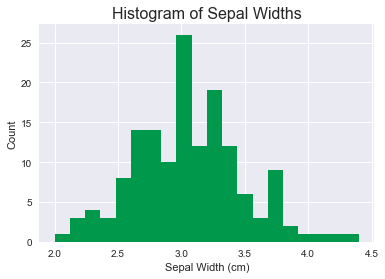

In [105]:
# get count
print 'count: %d' %df['sepal width (cm)'].count()

# count distinct
print 'count distinct: %d' %len(df['sepal width (cm)'].unique())

# get counts of each distinct value
data = df['sepal width (cm)'].value_counts()
print '\nmost common values (value  count):'
print data.head(5)

# plot binned values on a histogram
ax = df['sepal width (cm)'].hist(
    bins=20,
    color='#00994C',
)
ax.set_title("Histogram of Sepal Widths", fontsize=16)
ax.set_xlabel("Sepal Width (cm)")
ax.set_ylabel("Count")